# Forest Cover Type

In this notebook, I will make use of the Forest Cover dataset to try to predict the different Cover Types given the previded features. I will successivelly try differerent feature elimination techniques to see how this can affect training times and overall model accuracy. <br>

Reducing the number of features in a dataset, can lead to:

- Accuracy improvements
- Overfitting risk reduction
- Speed up in training
- Improved Data Visualization

## Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import preprocessing
import time
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/forest-cover-type-dataset/covtype.csv


In [2]:
df = pd.read_csv('/kaggle/input/forest-cover-type-dataset/covtype.csv')
pd.options.display.max_columns = None
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Elevation,0.0
Soil_Type28,0.0
Soil_Type17,0.0
Soil_Type18,0.0
Soil_Type19,0.0
Soil_Type20,0.0
Soil_Type21,0.0
Soil_Type22,0.0
Soil_Type23,0.0
Soil_Type24,0.0


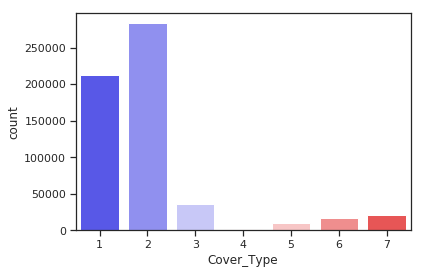

In [4]:
sns.set(style="ticks")
f = sns.countplot(x="Cover_Type", data=df, palette="bwr")
plt.show()

In [5]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [6]:
X = df.drop(['Cover_Type'], axis = 1)
Y = df['Cover_Type']

In [7]:
X.shape

(581012, 54)

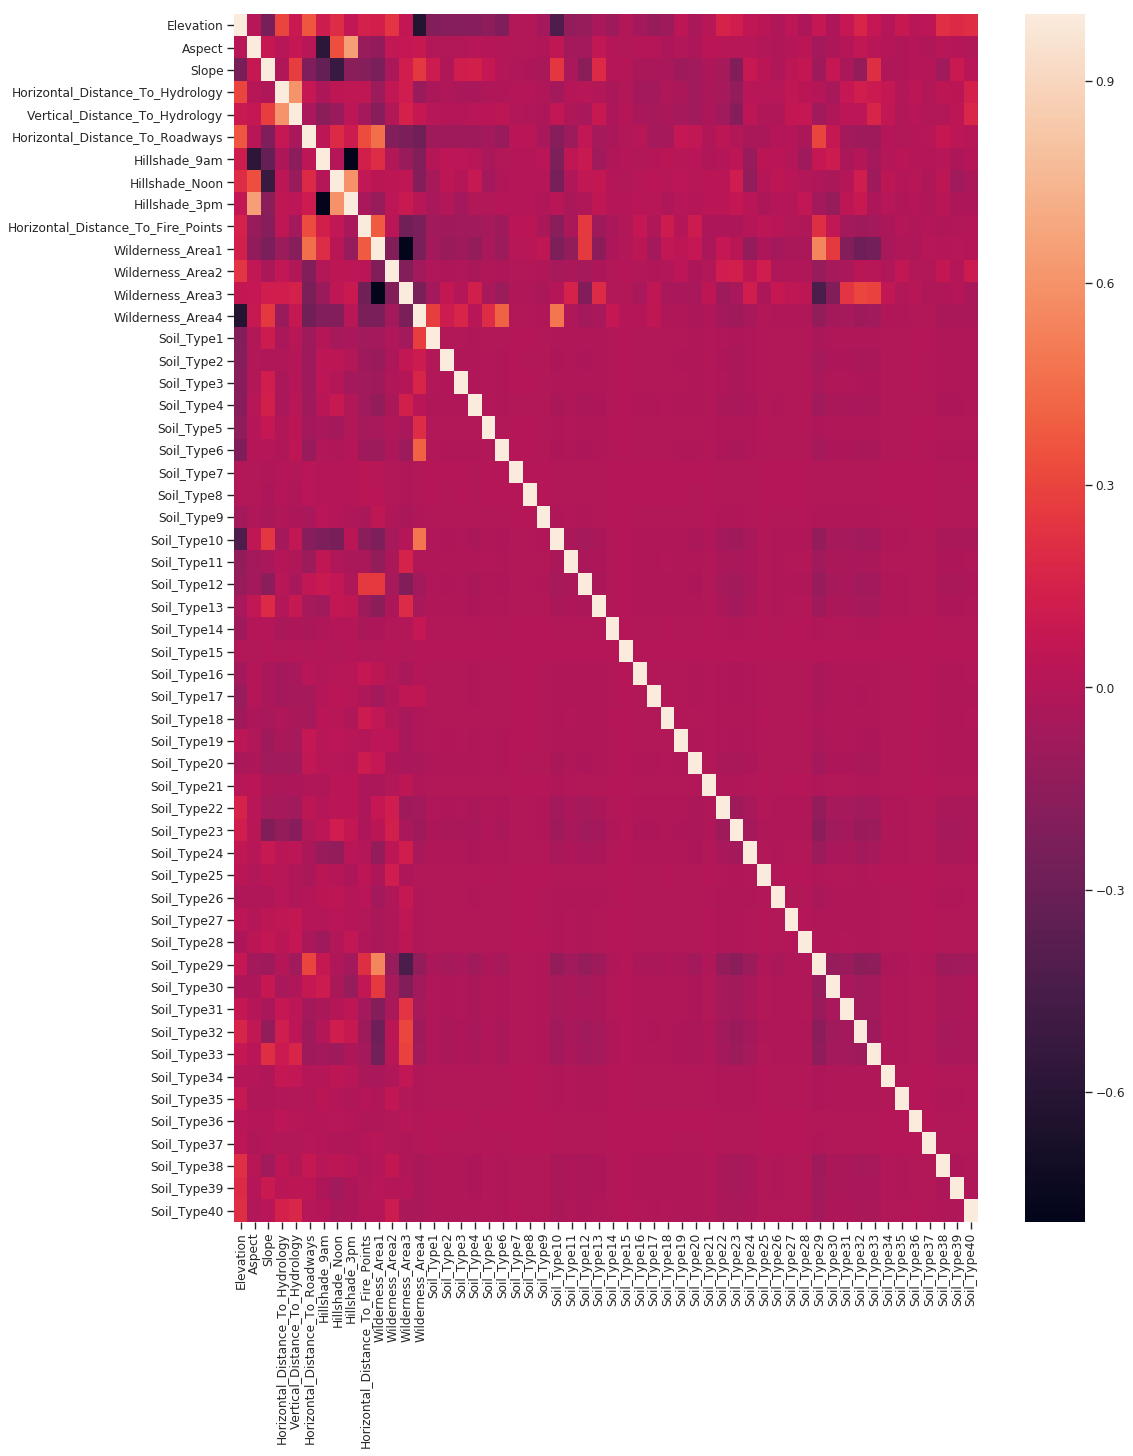

In [8]:
figure(num=None, figsize=(15, 20), dpi=80, facecolor='w', edgecolor='k')

corr= X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Machine Learning

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X2 = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30, random_state = 101)

In [11]:
start = time.process_time()
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1468.2401068580002
[[43670 18399    47     0     1     0  1282]
 [15429 67364  1940     3     2   145   110]
 [    1  1118  9411    68     0   224     0]
 [    0     0   580   166     0    83     0]
 [  122  2470   268     0    10     0     0]
 [    0  1898  3014    23     0   314     0]
 [ 2877    33    27     0     0     0  3205]]
              precision    recall  f1-score   support

           1       0.70      0.69      0.70     63399
           2       0.74      0.79      0.76     84993
           3       0.62      0.87      0.72     10822
           4       0.64      0.20      0.30       829
           5       0.77      0.00      0.01      2870
           6       0.41      0.06      0.10      5249
           7       0.70      0.52      0.60      6142

    accuracy                           0.71    174304
   macro avg       0.65      0.45      0.46    174304
weighted avg       0.71      0.71      0.70    174304



In [12]:
start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

12.891806234999876
[[59198  3821     6     0    49     7   318]
 [ 3683 80450   243     2   395   175    45]
 [    5   211 10052   102    27   425     0]
 [    0     2    95   683     0    49     0]
 [   64   442    29     0  2321    12     2]
 [    6   192   487    39    13  4512     0]
 [  321    50     0     0     0     0  5771]]
              precision    recall  f1-score   support

           1       0.94      0.93      0.93     63399
           2       0.94      0.95      0.95     84993
           3       0.92      0.93      0.93     10822
           4       0.83      0.82      0.83       829
           5       0.83      0.81      0.82      2870
           6       0.87      0.86      0.87      5249
           7       0.94      0.94      0.94      6142

    accuracy                           0.94    174304
   macro avg       0.90      0.89      0.89    174304
weighted avg       0.94      0.94      0.94    174304



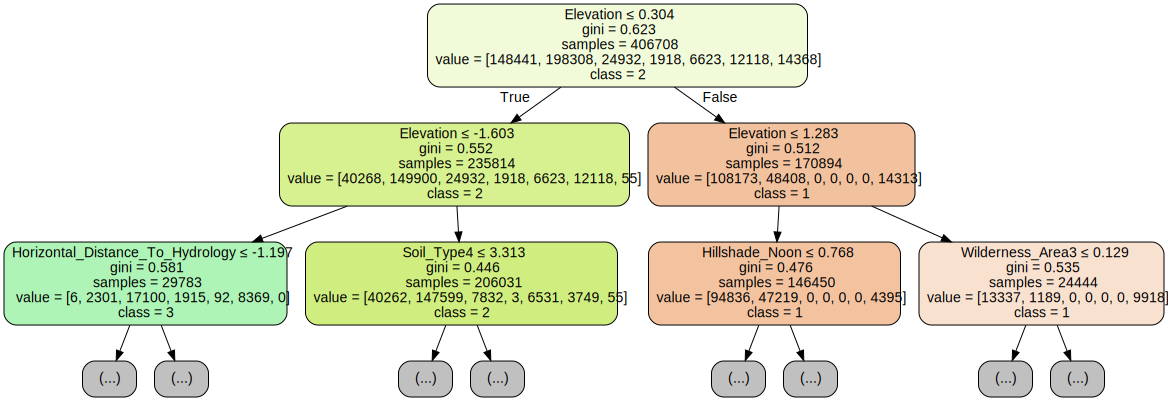

In [13]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(trainedtree,out_file=None,feature_names= X.columns,
                       class_names=['1', '2', '3', '4', '5', '6', '7'],  
                       filled=True, rounded=True,  
                       max_depth=2,
                       special_characters=True)
graph = graphviz.Source(data)
graph

In [14]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1273.6673220040002
[[59679  3564     2     0    17     5   132]
 [ 1896 82685   174     5   122    93    18]
 [    0   154 10415    40     6   207     0]
 [    0     0    84   714     0    31     0]
 [   38   625    32     0  2167     8     0]
 [    8   174   370    11     4  4682     0]
 [  282    39     0     0     0     0  5821]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63399
           2       0.95      0.97      0.96     84993
           3       0.94      0.96      0.95     10822
           4       0.93      0.86      0.89       829
           5       0.94      0.76      0.84      2870
           6       0.93      0.89      0.91      5249
           7       0.97      0.95      0.96      6142

    accuracy                           0.95    174304
   macro avg       0.95      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



### Feature Selection

There are many different methods which can be applied for Feature Selection. Some of the most important ones are:

- Filter Method = filtering our dataset and taking only a subset of it containg all the relevant features (eg. correlation matrix using Pearson Correlation)
- Wrapper Method = follows the same objective of the FIlter Method but uses a Machine Learning model as it's evaluation criteria (eg. Forward/Backward/Bidirectional/Recursive Feature Elimination). We feed some features to our Machine Learning model, evaluate their performance and then decide if add or remove feature to increase accuracy. As a result, this mothod can be more accurate than filtering, is more computationally expensive.
- Embedded Method = like the FIlter Method also the Embedded Method makes use of a Machine Learning model. The difference between the two different methods is that the Embedded Method examines the different training iterations of our ML model and then ranks the importance of each feature based on how much each of the features contributed to the ML model training (eg. LASSO Regularization).

#### Feature Importance

Decision Trees models which are based on ensembles (eg. Extra Trees and Random Forest) can be used to rank the importaqnce of the different features. Knowing which features our model is giving most importance can be of vital importance to understand how our model is making it's predictions (therefore making it more explainable). At the same time, we can get rid of the features which do not bring any benefit to our model (our confuse it to make a wrong decision!).

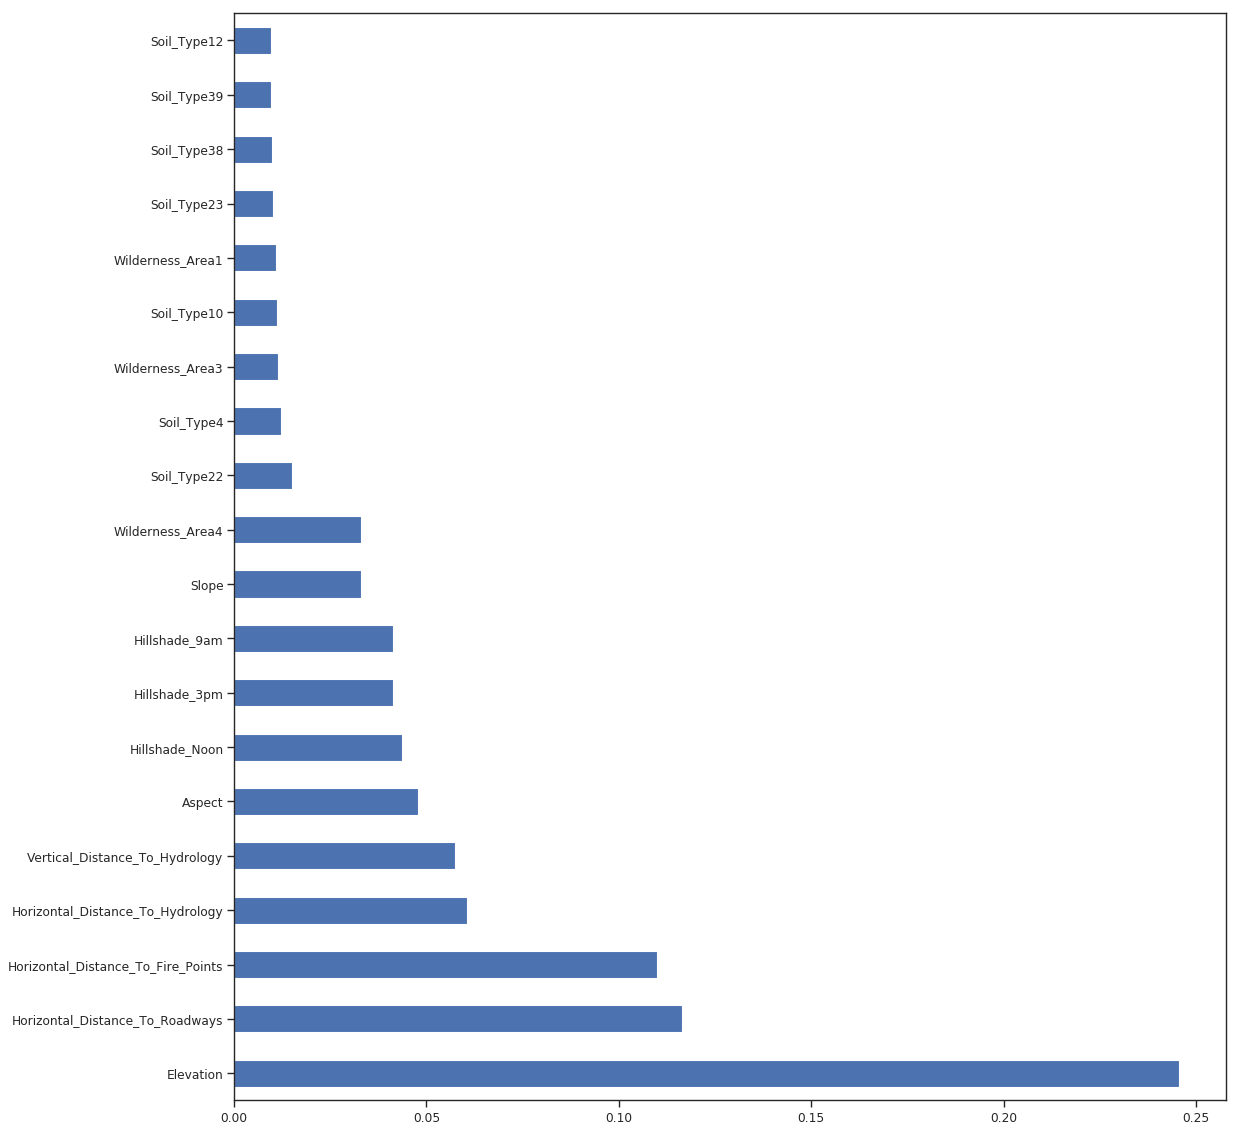

In [15]:
figure(num=None, figsize=(16, 18), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [16]:
X_Reduced = df[['Elevation','Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30, random_state = 101)

In [17]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

976.5061799249997
[[59039  4174     4     0    22     5   155]
 [ 3311 80958   393     2   178   135    16]
 [    2   499  9699   104    12   506     0]
 [    0     0   207   563     0    59     0]
 [   72   713    24     0  2046    13     2]
 [    5   424   740    37    11  4032     0]
 [  477    49     0     0     1     0  5615]]
              precision    recall  f1-score   support

           1       0.94      0.93      0.93     63399
           2       0.93      0.95      0.94     84993
           3       0.88      0.90      0.89     10822
           4       0.80      0.68      0.73       829
           5       0.90      0.71      0.80      2870
           6       0.85      0.77      0.81      5249
           7       0.97      0.91      0.94      6142

    accuracy                           0.93    174304
   macro avg       0.90      0.84      0.86    174304
weighted avg       0.93      0.93      0.93    174304



#### SelectFromModel: Meta-transformer for selecting features based on importance weights.

SelectFromModel is another Scikit-learn method which can be used for Feature Selection. This method can be used with all the different types of Scikit-learn models (after fitting) which have a coef_ or featureimportances attribute. Compared to RFE, SelectFromModel is a less robust solution. In fact, SelectFromModel just removes less important features based on a calculated threshold (no optimization iteration process involved).

In order to test SelectFromModel efficacy, I decided to use an ExtraTreesClassifier in this example. ExtraTreesClassifier (Extremely Randomized Trees) is tree based ensamble classifier which can yield less variance compared to Random Forest methods (reducing therefore the risk of overfitting). The main difference between Random Forest and Extremely Randomized Trees is that in Extremely Randomized Trees nodes are sampled without replacement.

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_Train,Y_Train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_Train)
Selected_X.shape

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


18.76214510400041


(406708, 12)

In [19]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, Y_Train)
print(time.process_time() - start)
Selected_X_Test = model.transform(X_Test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1165.7185971490003
[[59516  3766     1     0    11     7    98]
 [ 2346 82278   167     6    98    80    18]
 [    0   277 10269    57     4   215     0]
 [    0     1   108   693     0    27     0]
 [   35   817    29     0  1982     7     0]
 [    4   279   398    17     2  4549     0]
 [  397    33     0     0     0     0  5712]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63399
           2       0.94      0.97      0.95     84993
           3       0.94      0.95      0.94     10822
           4       0.90      0.84      0.87       829
           5       0.95      0.69      0.80      2870
           6       0.93      0.87      0.90      5249
           7       0.98      0.93      0.95      6142

    accuracy                           0.95    174304
   macro avg       0.94      0.88      0.91    174304
weighted avg       0.95      0.95      0.95    174304



Feature ranking:
1. feature 0 (0.312920)
2. feature 5 (0.143248)
3. feature 9 (0.133684)
4. feature 3 (0.071373)
5. feature 4 (0.067562)
6. feature 1 (0.050592)
7. feature 7 (0.046124)
8. feature 6 (0.042763)
9. feature 8 (0.042066)
10. feature 10 (0.038593)
11. feature 2 (0.034919)
12. feature 11 (0.016157)


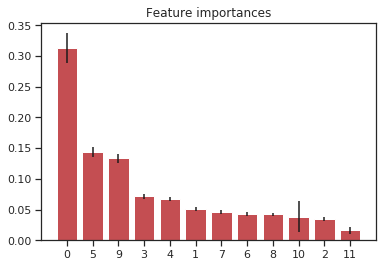

In [20]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = trainedforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in trainedforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Selected_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Selected_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Selected_X.shape[1]), indices)
plt.xlim([-1, Selected_X.shape[1]])
plt.show()

#### Correlation Matrix Analysis

Using Seaborn, we can now plot the Pearson correlation heatmap of our dataset. Inspecting this plot, we can then be able to see the correlation of our independent variables (X) with our label (Y). Finally, we can then select just the features which are most correlated with Y and train/test an SVM model to test the results of this approach.

Using Pearson correlation our returned coefficient values will vary between -1 and 1:

- If the correlation between two features is 0 this means that changing any of these two features will not affect the other.
- If the correlation between two features is greater than 0 this means that increating the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features).
- If the correlation between two features is less than 0 this means that increating the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features).

Another possible aspect to control in this analysis would be to check if the selected variables are highly correlated each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

In [21]:
Numeric_df = pd.DataFrame(X)
Numeric_df['Y'] = Y
Numeric_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Y
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Elevation           0.269554
Wilderness_Area4    0.323200
Y                   1.000000
Name: Y, dtype: float64

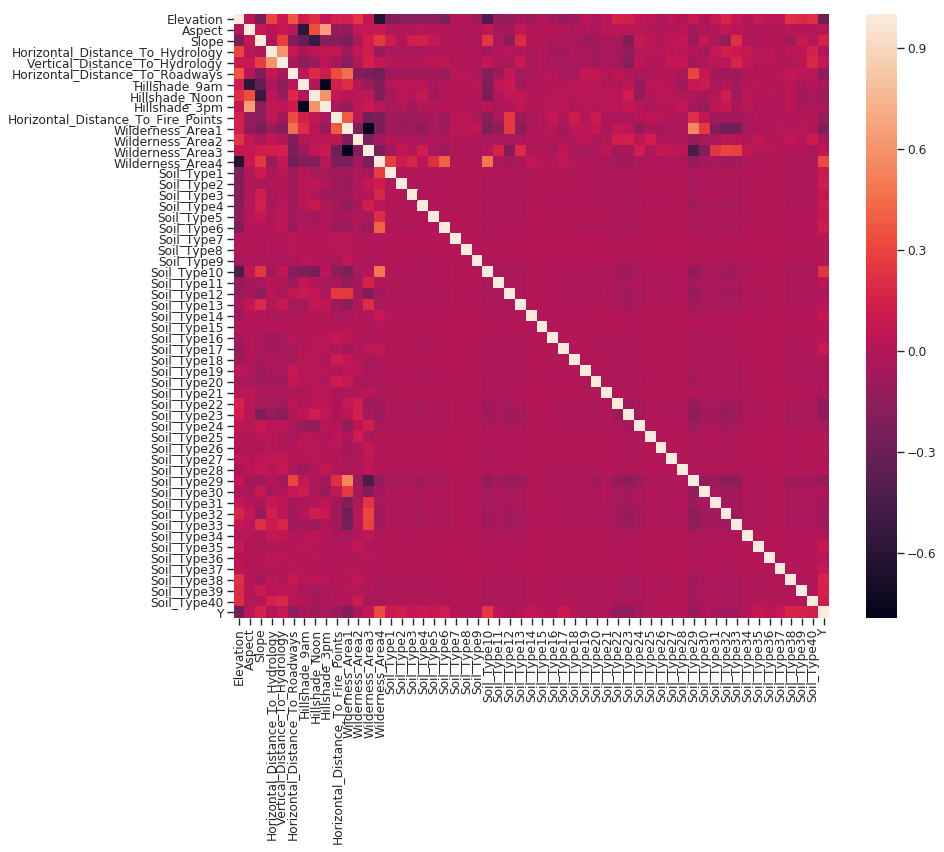

In [22]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr= Numeric_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Selecting only correlated features
corr_y = abs(corr["Y"])
highest_corr = corr_y[corr_y >0.25]
highest_corr.sort_values(ascending=True)

In [23]:
X_Reduced2 = X[['Elevation','Wilderness_Area4']]
X_Reduced2 = StandardScaler().fit_transform(X_Reduced2)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_Reduced2, Y, test_size = 0.30, random_state = 101)

In [24]:
start = time.process_time()
trainedsvm = svm.LinearSVC().fit(X_Train3, Y_Train3)
print(time.process_time() - start)
predictionsvm = trainedsvm.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionsvm))
print(classification_report(Y_Test3,predictionsvm))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


183.09225012000024
[[41874 21525     0     0     0     0     0]
 [16968 67087   938     0     0     0     0]
 [    0  4317  6505     0     0     0     0]
 [    0     0   829     0     0     0     0]
 [    0  2870     0     0     0     0     0]
 [    0  2319  2930     0     0     0     0]
 [ 6113    29     0     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.64      0.66      0.65     63399
           2       0.68      0.79      0.73     84993
           3       0.58      0.60      0.59     10822
           4       0.00      0.00      0.00       829
           5       0.00      0.00      0.00      2870
           6       0.00      0.00      0.00      5249
           7       0.00      0.00      0.00      6142

    accuracy                           0.66    174304
   macro avg       0.27      0.29      0.28    174304
weighted avg       0.60      0.66      0.63    174304



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Univariate Feature Selection

Univariate Feature Selection is a statistical method used to select the features which have the strongest relationship with our corrispondent labels. Using the SelectKBest method we can decide which metrics to use to evaluate our features and the number of K best features we want to keep. Different types of scoring functions are available depending on our needs:

- Classification: chi2, f_classif, mutual_info_classif
- Regression: f_regression, mutual_info_regression

In this example, we will be using chi2. Chi-squared (Chi2) can take as input just non-negative values, therefore, first of all we scale our input data in a range between 0 and 1.

In [25]:
min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X2)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=2).fit_transform(Scaled_X, Y)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30, random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

84.93948121299945
[[    0 63399     0     0     0     0     0]
 [    0 84055   938     0     0     0     0]
 [    0  4317  6505     0     0     0     0]
 [    0     0   829     0     0     0     0]
 [    0  2870     0     0     0     0     0]
 [    0  2319  2930     0     0     0     0]
 [    0  6142     0     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     63399
           2       0.52      0.99      0.68     84993
           3       0.58      0.60      0.59     10822
           4       0.00      0.00      0.00       829
           5       0.00      0.00      0.00      2870
           6       0.00      0.00      0.00      5249
           7       0.00      0.00      0.00      6142

    accuracy                           0.52    174304
   macro avg       0.16      0.23      0.18    174304
weighted avg       0.29      0.52      0.37    174304



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Lasso Regression

When applying regularization to a Machine Learning model, we add a penalty to the model parameters so that to avoid that our model tries to resemble too closely our input data. In this way, we can make our model less complex and we can avoid overfitting (making learn to our model not just the key data characheteristics but also it's intrinsic noise).

One of the possible Regularization Methods is Lasso (L1) Regrssion. When using Lasso Regression, the coefficients of the inputs features gets shrinken if they are not positively contributing towards our Machine Learning model training. In this way, some of the features might get automatically discarded assigning them coefficients equal to zero.

In [27]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:-1]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

LassoCV Best Alpha Scored:  0.00045057699749182086
LassoCV Model Accuracy:  0.32115743041655
Variables Eliminated:  2
Variables Kept:  52


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.66136089561041, tolerance: 79.27058967514648
  positive)


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

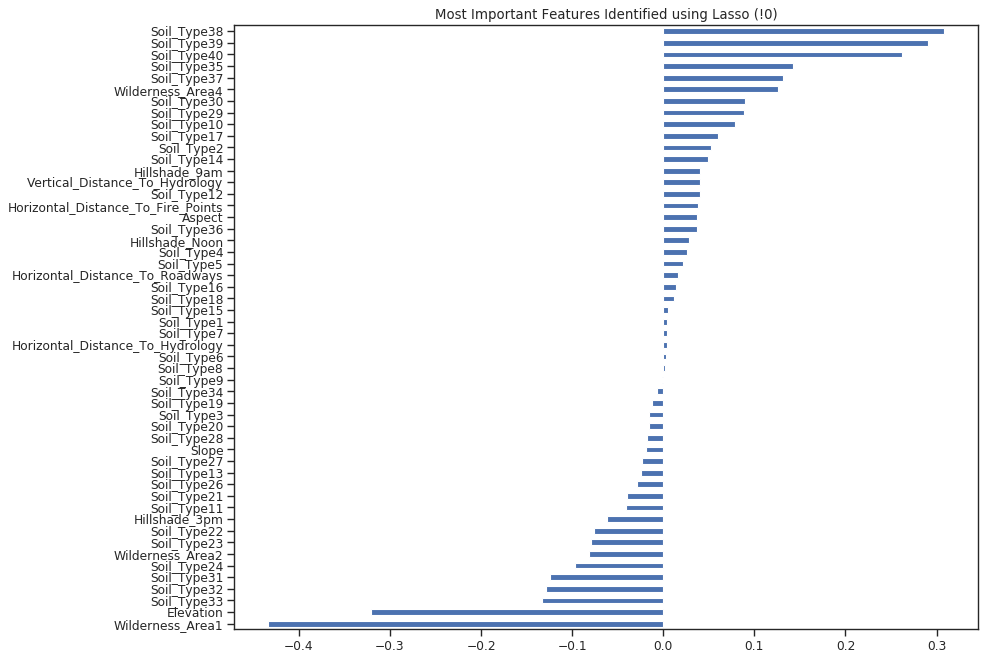

In [28]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")